# Baseline Code / Pipeline

This notebook serves as a simple baseline with a few pointers on what you could explore (by no means exhaustive). It also has an end-to-end working submission pipeline in place (for Kaggle), so you can build on top of this if you find it difficult creating your own pipeline. 

In [1]:
# Importing libraries

# Managing data
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load train data
train = pd.read_csv('../input/bank-deposit-prediction-ml-thon-2022/train_data.csv')

# Load test data
test = pd.read_csv('../input/bank-deposit-prediction-ml-thon-2022/test_data.csv')

# Data Exploration / Visualization

In this section, we will just briefly look at the data and understand what features we have to work with. As you may already know, the goal is to predict whether a client will subscribe to a deposit at a bank. We have many potentially relevant features (you may not need all of them) that could be related with the target variable. For instance, hypothetically if someone is young, they may be more interested in a deposit.

Let us explore some trends in the data and see if those will help us create a more accurate model. First, let us preview the data.

In [3]:
train

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,33,unemployed,single,unknown,0,170,yes,0,unknown,3,6,1,-1,0,unknown,0
1,1,37,services,married,secondary,0,6089,yes,0,cellular,14,5,2,-1,0,unknown,1
2,2,35,blue-collar,married,secondary,0,137,no,1,unknown,4,10,1,808,12,failure,0
3,3,38,admin.,divorced,secondary,0,673,yes,0,cellular,7,5,1,170,3,other,0
4,4,44,services,divorced,secondary,0,2416,yes,0,unknown,14,5,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,22601,46,blue-collar,married,secondary,0,4044,no,0,cellular,7,7,3,-1,0,unknown,0
22602,22602,45,management,divorced,tertiary,0,-90,yes,0,cellular,29,1,1,192,1,failure,0
22603,22603,46,admin.,married,secondary,0,0,yes,0,cellular,26,10,1,185,2,other,0
22604,22604,52,management,married,secondary,0,173,no,0,unknown,23,5,5,-1,0,unknown,0


In [4]:
train['loan'].unique()

array([0, 1])

From this, you can get a sense for the kind of values in each column. For more information on what each column value means, refer to the competition data description on the kaggle competition dashboard.

Let us explore a few features individually, starting with marital as it is a simple field.

<AxesSubplot:ylabel='index'>

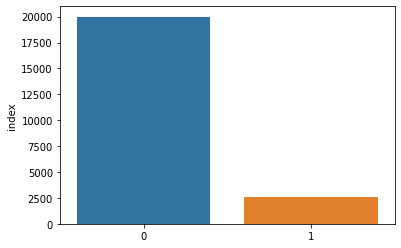

In [5]:
sns.barplot(x = [0, 1], y = train.groupby(['y']).count()['index'], )

There is severe class imbalance in this data. We have very few samples of customers actually depositing money, so our model may learn and predict them less often than they actually occur. 


In [6]:
train.groupby('marital').mean()

,index,age,default,balance,loan,day,month,campaign,pdays,previous,y
marital,,,,,,,,,,,
divorced,11168.337368,45.973838,0.025381,1224.935572,0.181570,15.850059,6.124561,2.563061,41.843421,0.547833,0.118704
married,11288.578387,43.418675,0.016603,1405.632016,0.171981,15.893623,6.254702,2.853218,37.647297,0.542242,0.100646
single,11385.368257,33.733872,0.018187,1278.823877,0.130266,15.724856,5.865226,2.677444,44.918234,0.660811,0.145966


This shows the average values for different columns bucketized by the value of marital. So for instance, on average 11.8% of divorced customers subscribe to a deposit. On the other hand, single customers are more likely to deposit.
You must also note class imbalance though, so there may be much fewer entries of divorced customers as compared to other categories.

In [7]:
train.groupby('job').mean()

,index,age,default,balance,loan,day,month,campaign,pdays,previous,y
job,,,,,,,,,,,
admin.,11326.541488,39.190884,0.017141,1098.794702,0.189326,15.533697,5.861706,2.535255,48.362291,0.681730,0.122711
blue-collar,11218.044834,40.043407,0.021806,1050.124516,0.178113,15.608926,5.735480,2.846546,43.110047,0.507235,0.073568
entrepreneur,11123.060766,42.223250,0.040951,1664.129458,0.235139,15.471598,6.431968,2.669749,34.487450,0.476882,0.075297
housemaid,11514.063566,46.534884,0.012403,1420.821705,0.119380,16.361240,6.609302,2.893023,19.145736,0.339535,0.089922
management,11264.962772,40.580805,0.014848,1705.415537,0.125888,16.285561,6.576286,2.905961,39.116419,0.649666,0.135356
retired,11304.007188,61.407008,0.010782,2064.508535,0.141060,15.274933,6.348607,2.313567,38.672058,0.618149,0.227314
self-employed,11019.445409,40.964020,0.019851,1484.235732,0.147643,15.509926,6.539702,2.908189,30.897022,0.473945,0.114144
services,11228.221098,38.802505,0.018786,1001.702312,0.207611,15.568882,5.767341,2.733622,43.474470,0.499037,0.092004
student,11697.345708,26.781903,0.002320,1392.389791,0.004640,14.825986,5.726218,2.211137,54.443155,0.990719,0.292343


Again, there is huge variation between the average number of people who deposit across jobs. For instance, students deposit the most, followed by retired customers. 

In [8]:
train.groupby('education').mean()

,index,age,default,balance,loan,day,month,campaign,pdays,previous,y
education,,,,,,,,,,,
primary,11212.019281,45.969784,0.019281,1303.024748,0.153381,15.419568,5.970072,2.810935,34.776978,0.464173,0.087482
secondary,11324.477582,39.884722,0.019917,1135.019745,0.188653,15.792550,5.997586,2.689343,42.438524,0.572771,0.103639
tertiary,11281.570129,39.664139,0.013798,1737.478393,0.129947,16.121607,6.459439,2.856103,39.772100,0.660955,0.149810
unknown,11513.115139,44.617271,0.020256,1435.561834,0.070362,16.020256,6.022388,3.018124,35.422175,0.447761,0.126866


Again, it seems that those who receive only primary education do not subscribe to bank deposits as much as those with tertiary education. 

Plotting a few features and their relationship with y:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='default', ylabel='y'>

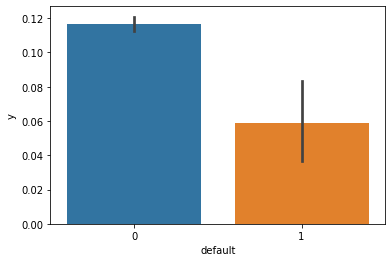

In [9]:
sns.barplot(train['default'], train['y'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='age'>

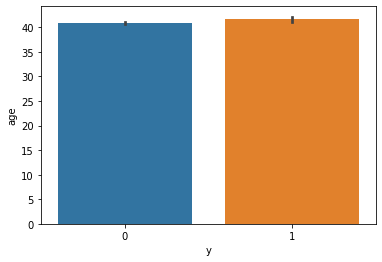

In [10]:
sns.barplot(train['y'], train['age'])

Note that in this plot and the one below, the horizontal axis is y and the vertical axis is the average age. So the above bar graph tells us that the average age of people who deposit and don't deposit isn't very different. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='balance'>

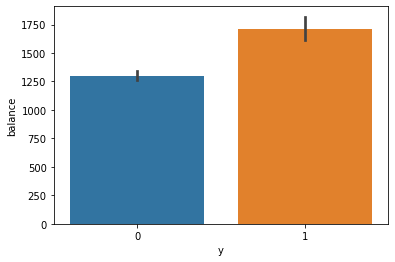

In [11]:
sns.barplot(train['y'], train['balance'])

# Data Processing

This raw data cannot be fed into a machine learning model, especially because there are some columns which have text data. There are multiple ways to convert text data to numerical data. We will be using Label Encoding, which essentially assigns a number to each category. For example, the martial column will assign values of 1 to single, 2 to married, and 3 to divorce.

In [12]:
from sklearn.preprocessing import LabelEncoder
# We need to concatenate the data before preprocessing. This way, any changes made to the train data 
# are also done to the test data  in a similar manner. If you don't do this step, the test data will be completely
# unseen to the model.
data = pd.concat([train, test])

In [13]:
for col in data.columns:
    if data[col].dtype == 'O':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [14]:
train = data[:len(train)]
test = data[len(train):].drop(['y'], axis = 1)
train

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,33,10,2,3,0,170,1,0,2,3,6,1,-1,0,3,0.0
1,1,37,7,1,1,0,6089,1,0,0,14,5,2,-1,0,3,1.0
2,2,35,1,1,1,0,137,0,1,2,4,10,1,808,12,0,0.0
3,3,38,0,0,1,0,673,1,0,0,7,5,1,170,3,1,0.0
4,4,44,7,0,1,0,2416,1,0,2,14,5,3,-1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,22601,46,1,1,1,0,4044,0,0,0,7,7,3,-1,0,3,0.0
22602,22602,45,4,0,2,0,-90,1,0,0,29,1,1,192,1,0,0.0
22603,22603,46,0,1,1,0,0,1,0,0,26,10,1,185,2,1,0.0
22604,22604,52,4,1,1,0,173,0,0,2,23,5,5,-1,0,3,0.0


In [15]:
test

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,22606,60,9,1,1,0,2639,1,0,2,14,5,2,-1,0,3
1,22607,31,0,1,1,0,0,1,1,2,6,5,2,-1,0,3
2,22608,31,9,1,1,0,171,0,0,0,27,8,3,-1,0,3
3,22609,36,4,1,2,0,1852,0,0,2,8,5,1,-1,0,3
4,22610,28,3,2,2,0,731,1,0,0,6,2,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22600,45206,57,5,1,1,0,519,1,0,2,3,6,3,-1,0,3
22601,45207,31,0,1,1,0,389,1,0,0,7,12,1,185,2,0
22602,45208,33,4,2,2,0,4128,1,0,2,12,5,6,-1,0,3
22603,45209,32,9,2,1,0,-28,0,1,2,4,7,1,-1,0,3


# Modelling

We will now finally create the machine learning model. For this, I am going to use a simple Random Forest model. 
A random forest model simply takes the majority vote of multiple decision trees. If you want to understand how decision trees work, you can refer to videos on our starter resources page on our website. 

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 250, random_state = 42, max_features = 'sqrt', n_jobs = -1)
rf.fit(train.drop(['y', 'index'], axis = 1), train['y'])

RandomForestClassifier(max_features='sqrt', n_estimators=250, n_jobs=-1,
                       random_state=42)

In [17]:
# You are allowed to predict probabilities in this competition. 
# Instead of directly submitting the final prediction of 0 or 1, 
# you can submit the probability that the answer is 1.
final_predictions = rf.predict_proba(test.drop(['index'], axis=1))[:, 1]
sub = pd.DataFrame()
sub['index'] = test['index']
sub['y'] = final_predictions
sub

,index,y
0,22606,0.036
1,22607,0.012
2,22608,0.016
3,22609,0.056
4,22610,0.112
...,...,...
22600,45206,0.016
22601,45207,0.392
22602,45208,0.080
22603,45209,0.084


In [18]:
sub.to_csv('submission.csv', index=False)

Now, to submit simply upload this submission.csv file onto Kaggle, and it will be automatically scored. 

# Going forward:
1. Explore the data in more detail through other kinds of plots and various feature interactions. See what kind of new features you can make, or how you can modify the features to make them more predictive.
2. Try changing the model. I have used a very basic model, and you can do much better easily.
3. Tune hyperparameters. 

The organizing team is always available if you need help with brainstorming ideas, debugging your code or even implementing any ideas you may have. We'd be happy to help. Just note that we cannot write code for you, as that would be against the spirit of the competition. 